In [89]:
# importing required pakages and libraries
import numpy as np
import pandas as pd
import eli5
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.inspection import permutation_importance
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif,chi2,f_classif
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, roc_auc_score, 
f1_score,recall_score,roc_curve,precision_score,auc,)
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTENC, ADASYN
from optbinning import OptimalBinning
import category_encoders as ce
import matplotlib.pyplot as plt 
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
sb.set()

In [90]:
# loading data
data = pd.read_csv('micro_credit_model.csv')
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


## EDA and  Data pre-processing

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [92]:
data.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [93]:
# locating columns having minimum value less than 0 
for col in data.describe().columns:
    if data.describe().loc['min',col] <0:
        print('column: ',col,'; min value: ', data.describe().loc['min',col])

column:  aon ; min value:  -48.0
column:  daily_decr30 ; min value:  -93.0126666666667
column:  daily_decr90 ; min value:  -93.0126666666667
column:  rental30 ; min value:  -23737.14
column:  rental90 ; min value:  -24720.58
column:  last_rech_date_ma ; min value:  -29.0
column:  last_rech_date_da ; min value:  -29.0
column:  medianmarechprebal30 ; min value:  -200.0
column:  medianmarechprebal90 ; min value:  -200.0


In [94]:
# replacing negative values with positive
data[data.columns[data.dtypes != np.object]] = data[data.columns[data.dtypes != np.object]].abs()

In [95]:
# re-labeling Non-Defaulter class with 0 and Defaulter class with 1
data['label'] = data['label'].map({0:1,1:0})

In [96]:
# droping column 'Unnamed: 0'
data.drop('Unnamed: 0',1,inplace = True)

In [97]:
# extracting new features from user mobile number (msisdn)
data[['msisdn_1','msisdn_2']]  = data['msisdn'].str.split('I', expand = True)
data.drop('msisdn',1, inplace =True)

In [98]:
data

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,msisdn_1,msisdn_2
0,1,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539.0,2.0,...,2.0,12.0,6.0,0.0,29.000000,29.000000,UPW,2016-07-20,21408,70789
1,0,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787.0,1.0,...,1.0,12.0,12.0,0.0,0.000000,0.000000,UPW,2016-08-10,76462,70374
2,0,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539.0,1.0,...,1.0,6.0,6.0,0.0,0.000000,0.000000,UPW,2016-08-19,17943,70372
3,0,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947.0,0.0,...,2.0,12.0,6.0,0.0,0.000000,0.000000,UPW,2016-06-06,55773,70781
4,0,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309.0,7.0,...,7.0,42.0,6.0,0.0,2.333333,2.333333,UPW,2016-06-22,03813,82730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048.0,3.0,...,2.0,12.0,6.0,0.0,1.000000,1.000000,UPW,2016-06-17,22758,85348
209589,0,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773.0,4.0,...,3.0,18.0,6.0,0.0,1.000000,1.000000,UPW,2016-06-12,95583,84455
209590,0,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539.0,5.0,...,6.0,54.0,12.0,0.0,4.000000,3.833333,UPW,2016-07-29,28556,85350
209591,0,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773.0,5.0,...,3.0,24.0,12.0,0.0,0.000000,10.500000,UPW,2016-07-25,59712,82733


In [99]:
# defining function to extract categorical date information like month, year, weekday.
def to_date_time(col, df):
    df[col] = pd.to_datetime(df[col], infer_datetime_format = True)
        
    if len(df[col].dt.year.unique()) != 1:
        df[col+'(year)'] = df[col].dt.year
    else:
        pass
    if len(df[col].dt.month.unique()) != 1:
        df[col+'(month)'] = df[col].dt.month
        
        month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
        df[col+'(month)'] = df[col+'(month)'].map(month_map)
    
    else:
        pass
    if len(df[col].dt.dayofweek.unique()) != 1:
        df[col+'(weekday)'] = df[col].dt.dayofweek
        
        weekday_map = {6:'SUN', 5:'SAT', 4:'FRI', 3:'THU', 2:'WED', 1:'TUE', 0: 'MON'}
        df[col+'(weekday)'] = df[col+'(weekday)'].map(weekday_map)
        
        
    df.drop([col], 1, inplace = True)
    
    return df       

In [100]:
# applying user-defined function to extract date information
to_date_time('pdate',data)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,msisdn_1,msisdn_2,pdate(month),pdate(weekday)
0,1,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539.0,2.0,...,12.0,6.0,0.0,29.000000,29.000000,UPW,21408,70789,Jul,WED
1,0,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787.0,1.0,...,12.0,12.0,0.0,0.000000,0.000000,UPW,76462,70374,Aug,WED
2,0,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539.0,1.0,...,6.0,6.0,0.0,0.000000,0.000000,UPW,17943,70372,Aug,FRI
3,0,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947.0,0.0,...,12.0,6.0,0.0,0.000000,0.000000,UPW,55773,70781,Jun,MON
4,0,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309.0,7.0,...,42.0,6.0,0.0,2.333333,2.333333,UPW,03813,82730,Jun,WED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048.0,3.0,...,12.0,6.0,0.0,1.000000,1.000000,UPW,22758,85348,Jun,FRI
209589,0,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773.0,4.0,...,18.0,6.0,0.0,1.000000,1.000000,UPW,95583,84455,Jun,SUN
209590,0,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539.0,5.0,...,54.0,12.0,0.0,4.000000,3.833333,UPW,28556,85350,Jul,FRI
209591,0,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773.0,5.0,...,24.0,12.0,0.0,0.000000,10.500000,UPW,59712,82733,Jul,MON


In [101]:
for col in data.columns:
    print('no. of unique values of '+col+':', data[col].value_counts().count())

no. of unique values of label: 2
no. of unique values of aon: 4499
no. of unique values of daily_decr30: 146598
no. of unique values of daily_decr90: 158246
no. of unique values of rental30: 129745
no. of unique values of rental90: 138712
no. of unique values of last_rech_date_ma: 1157
no. of unique values of last_rech_date_da: 1163
no. of unique values of last_rech_amt_ma: 70
no. of unique values of cnt_ma_rech30: 71
no. of unique values of fr_ma_rech30: 1083
no. of unique values of sumamnt_ma_rech30: 15141
no. of unique values of medianamnt_ma_rech30: 510
no. of unique values of medianmarechprebal30: 29634
no. of unique values of cnt_ma_rech90: 110
no. of unique values of fr_ma_rech90: 89
no. of unique values of sumamnt_ma_rech90: 31771
no. of unique values of medianamnt_ma_rech90: 608
no. of unique values of medianmarechprebal90: 28957
no. of unique values of cnt_da_rech30: 1066
no. of unique values of fr_da_rech30: 1072
no. of unique values of cnt_da_rech90: 27
no. of unique values

In [102]:
# deleting column having unique value equal to 1
data.drop('pcircle',1,inplace = True)

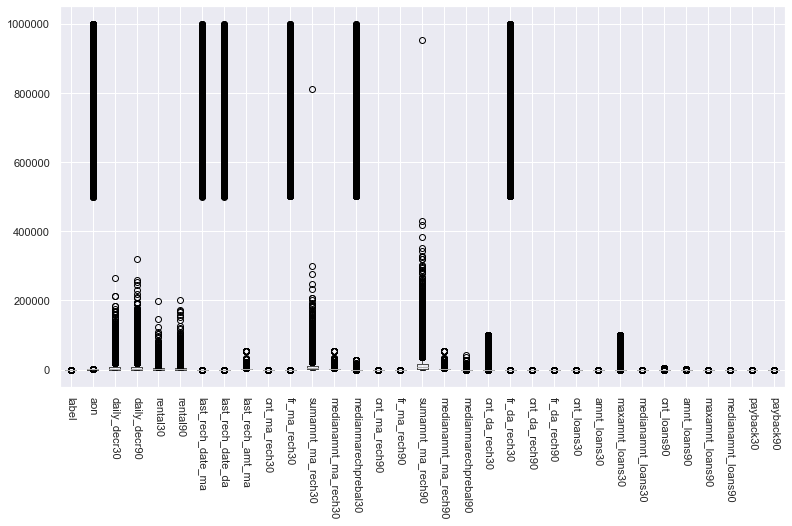

In [103]:
data.boxplot(column = list(data.select_dtypes(include = ['float64','int64'])), figsize = (13,7))
plt.xticks(rotation = -90)
plt.show()

In [104]:
numeric = list(data.select_dtypes(include = ['float64','int64']).columns)
numeric.remove('label')

In [105]:
# removing extreme data that are greater than 400000
data = data[(data[numeric] < 400000).all(1)]

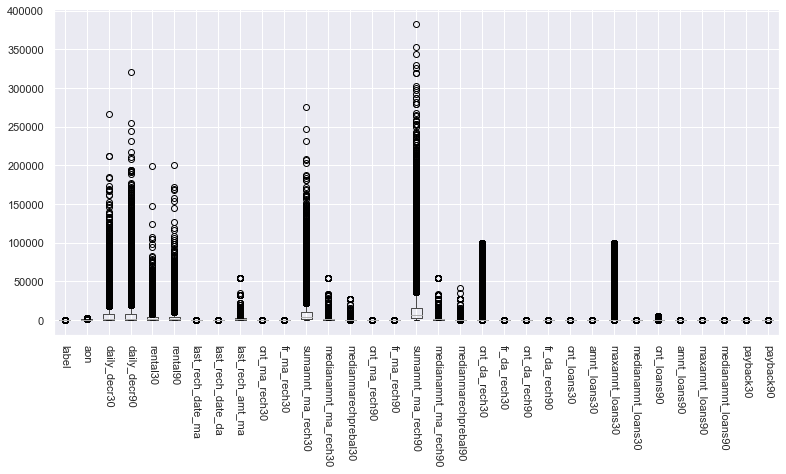

In [106]:
data.boxplot(column = list(data.select_dtypes(include = ['float64','int64'])), figsize = (13,6))
plt.xticks(rotation = -90)
plt.show()

In [107]:
# checking data skewness
data[list(data.select_dtypes(include = ['float64','int64']))].skew()

label                    2.272336
aon                      0.951878
daily_decr30             3.931559
daily_decr90             4.216164
rental30                 4.595480
rental90                 4.487068
last_rech_date_ma        3.467326
last_rech_date_da        9.663640
last_rech_amt_ma         3.701112
cnt_ma_rech30            3.208129
fr_ma_rech30             2.022272
sumamnt_ma_rech30        4.098900
medianamnt_ma_rech30     3.454903
medianmarechprebal30    38.885138
cnt_ma_rech90            3.423815
fr_ma_rech90             2.288854
sumamnt_ma_rech90        4.072404
medianamnt_ma_rech90     3.726646
medianmarechprebal90    44.881289
cnt_da_rech30           17.794207
fr_da_rech30            31.132380
cnt_da_rech90           27.395396
fr_da_rech90            29.133670
cnt_loans30              2.704906
amnt_loans30             2.953735
maxamnt_loans30         17.589332
medianamnt_loans30       4.552934
cnt_loans90             16.605955
amnt_loans90             3.136406
maxamnt_loans9

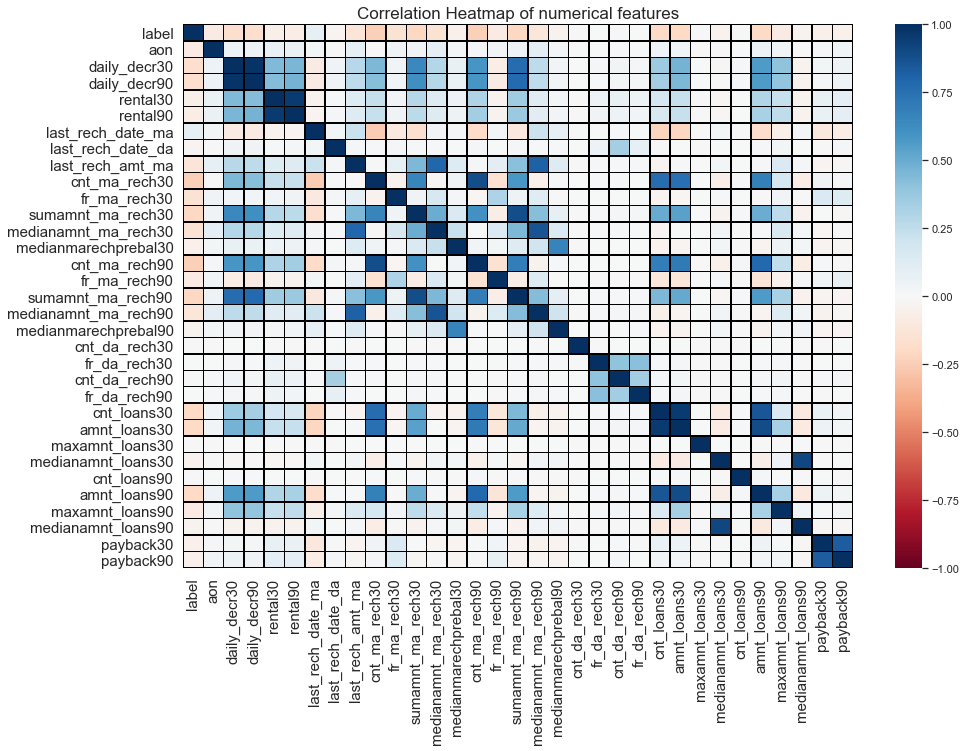

In [108]:
plt.figure(figsize = (15,10))
sb.heatmap(data[list(data.select_dtypes(include = ['float64','int64']).columns)].corr(), cmap = 'RdBu', vmin = -1, vmax = 1, center = 0, 
           linewidth = .5, linecolor = 'black')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Correlation Heatmap of numerical features', fontsize = 17)
plt.show()

In [109]:
# removing highly correlated variables
data = data.drop(['daily_decr30','rental30','cnt_loans30'],1)

In [110]:
# separating numerical and categorical columns for separate analysis.

numeric = [] # list containing numeric columns
cat = [] # list containing catrgoric columns

for col in data.columns:
    if str(data[col].dtype) == 'object':
        cat.append(col)
    else:
        numeric.append(col) 
print ('numeric columns:', numeric,'\n')
print('categoric columns:', cat)

numeric columns: ['label', 'aon', 'daily_decr90', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'] 

categoric columns: ['msisdn_1', 'msisdn_2', 'pdate(month)', 'pdate(weekday)']


In [111]:
numeric.remove('label')
cat.append('label')

In [112]:
numeric_data = data[numeric]

In [113]:
# calculating Variance Inflation Factor(VIF) for each numerical column
vif_list = []
for i in range(0, len(numeric)):
    y = numeric_data.loc[:,numeric_data.columns == numeric[i]]
    x = numeric_data.loc[:,numeric_data.columns != numeric[i]]
    model = LinearRegression()
    model.fit(x,y)
    pred = model.predict(x)
    rsq =  r2_score(y,pred)
    vif = round(1 / (1 - rsq), 2)
    vif_list.append((numeric[i],vif))

VIF_df = pd.DataFrame(vif_list, columns = ['features', 'VIF'])

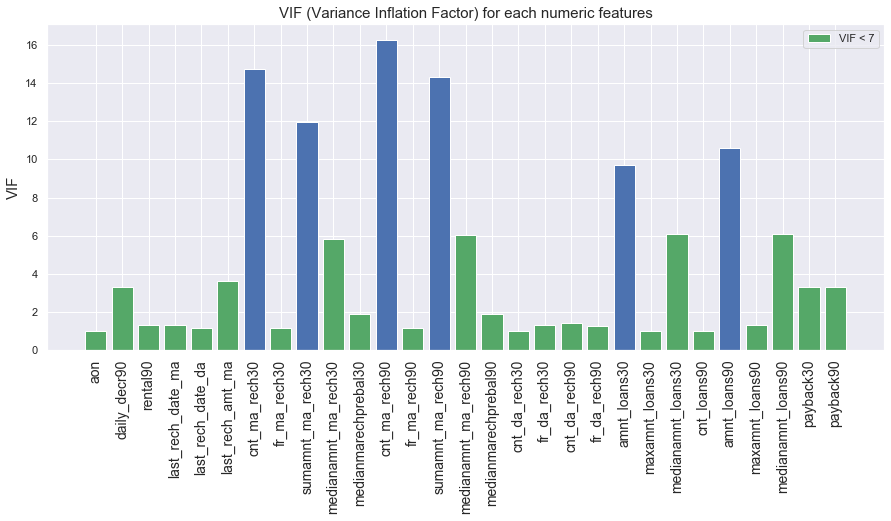

In [114]:
plt.figure(figsize = (15,6))
VIF_df['colors'] = 'g'
VIF_df.loc[VIF_df.VIF >= 7,'colors'] = 'b'
plt.bar(numeric, VIF_df.VIF, color=VIF_df.colors)
plt.xticks(rotation = 90, fontsize = 14)
plt.legend(['VIF < 7'])
plt.ylabel('VIF',fontsize = 15)
plt.title('VIF (Variance Inflation Factor) for each numeric features', fontsize = 15)
plt.show()

In [115]:
# removing features having VIF greater than or equal to 7
for i, feat in enumerate(list(VIF_df.features)):
    if VIF_df.iloc[i,1] >= 7:
        data.drop(feat,1,inplace = True)

In [116]:
cat.remove('label')

In [117]:
data_copy = data.copy()
for col in cat:
    le = LabelEncoder()
    data_copy[col] = le.fit_transform(data_copy[col].values.reshape(-1,1))

In [118]:
# calculating feature importance using SelectKBest and mutual_info_classif
selector = SelectKBest(mutual_info_classif, k = 'all')
selector.fit( data_copy.drop('label',1), data['label'])
score_df = pd.DataFrame(dict(Feature = data.drop('label',1).columns, Scores = selector.scores_))
score_df = score_df.sort_values(by = 'Scores', ascending = False )

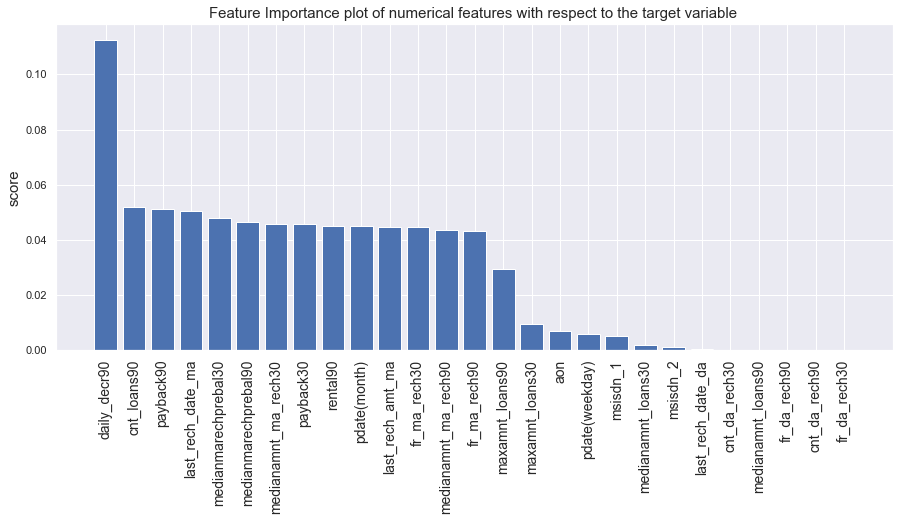

In [119]:
plt.figure(figsize = (15,6))
plt.bar(score_df.Feature, score_df.Scores)
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('score',fontsize = 15)
plt.title('Feature Importance plot of numerical features with respect to the target variable ', fontsize = 15)
plt.show()

In [120]:
# removing features that are having comparativley less feature importance score
for col in score_df.iloc[-12:,:].Feature:
    data.drop(col,1,inplace = True)

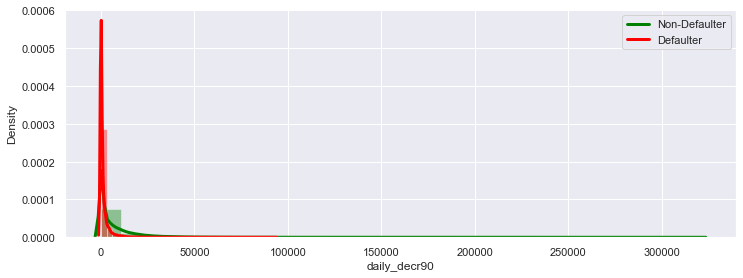

In [121]:
for i, col in enumerate(['daily_decr90']):    
    plt.subplot(4,2, i+1)

    sb.distplot(data[col][data['label'] == 0], kde = True, bins = 30 , color = 'green', kde_kws=dict(linewidth=3))
    sb.distplot(data[col][data['label'] == 1], kde = True, bins = 30, color = 'red',kde_kws=dict(linewidth=3))
    plt.legend(['Non-Defaulter','Defaulter'])
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(20,15)
    plt.tight_layout()
plt.show()

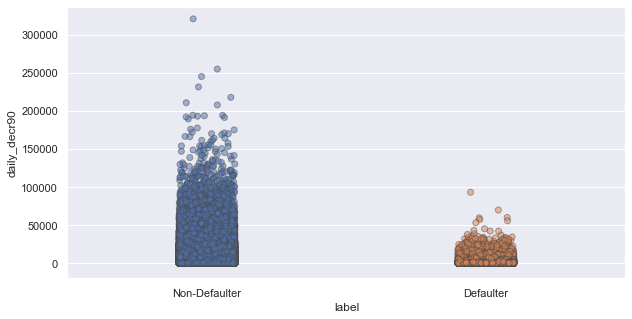

In [122]:
plt.figure(figsize = (10,5))
ax = sb.stripplot(x = 'label', y = 'daily_decr90', data = data, alpha = 0.5 ,linewidth = 1, size = 6)
ax.set_xticklabels(['Non-Defaulter','Defaulter'])
plt.show()

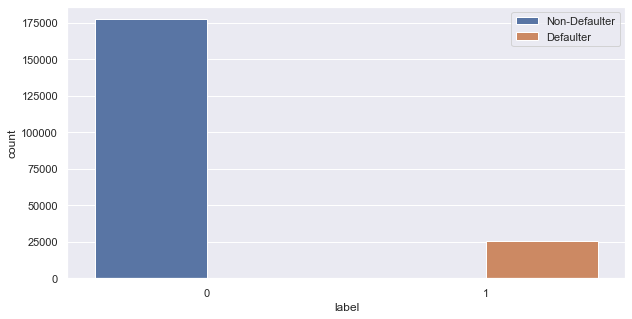

In [123]:
plt.figure(figsize = (10,5))
sb.countplot(x = 'label', data = data, hue = 'label')
plt.legend(['Non-Defaulter','Defaulter'])
plt.show()

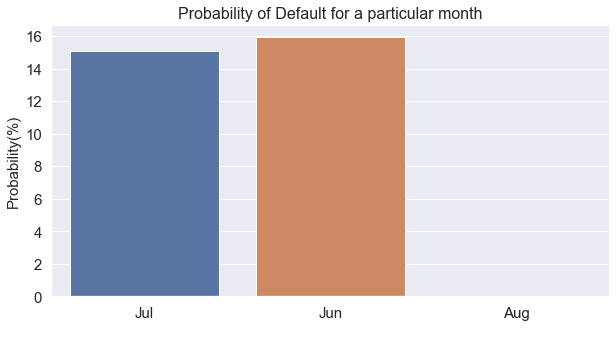

In [124]:
plt.figure(figsize = (10,5))
success = data[data['label'] == 0]['pdate(month)'].value_counts()
failure = data[data['label'] == 1]['pdate(month)'].value_counts()
df = pd.DataFrame([success,failure])
df.index = ['Non-Defaulter','Defaulter']
df = df.T
df['prob%'] = (df['Defaulter']/(df['Non-Defaulter'] + df['Defaulter']))*100

sb.barplot(x = df.index, y = 'prob%', data = df, palette = 'deep')
plt.ylabel('Probability(%)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel(' ' , fontsize = 15)
plt.yticks(fontsize = 15)
plt.title( 'Probability of Default for a particular month', fontsize = 16)
plt.show()

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202378 entries, 0 to 209592
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 202378 non-null  int64  
 1   daily_decr90          202378 non-null  float64
 2   rental90              202378 non-null  float64
 3   last_rech_date_ma     202378 non-null  float64
 4   last_rech_amt_ma      202378 non-null  float64
 5   fr_ma_rech30          202378 non-null  float64
 6   medianamnt_ma_rech30  202378 non-null  float64
 7   medianmarechprebal30  202378 non-null  float64
 8   fr_ma_rech90          202378 non-null  float64
 9   medianamnt_ma_rech90  202378 non-null  float64
 10  medianmarechprebal90  202378 non-null  float64
 11  cnt_loans90           202378 non-null  float64
 12  maxamnt_loans90       202378 non-null  float64
 13  payback30             202378 non-null  float64
 14  payback90             202378 non-null  float64
 15  

In [126]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(data.drop(['label'], 1), 
                                                    data['label'],
                                                    stratify = data['label'],
                                                    test_size = 0.30, random_state = 0)

In [127]:
# selecting numerical features
numeric = x_train.select_dtypes(include = ['float','int64']).columns

In [128]:
# supervised binning numerical variables and transforming it on the bases of Weigth of Evidience(WOE)
for col in   numeric:
    
    optb = OptimalBinning(name =  col, dtype='numerical',
                      solver='cp', monotonic_trend = None)
    optb.fit(x_train[col].values, y_train)
    print('binning status for column ' + col+ ' is',optb.status,'\n')
    
    x_train[col] = optb.transform(x_train[col].values , metric='woe')
    x_test[col] = optb.transform(x_test[col].values , metric='woe')

binning status for column daily_decr90 is OPTIMAL 

binning status for column rental90 is OPTIMAL 

binning status for column last_rech_date_ma is OPTIMAL 

binning status for column last_rech_amt_ma is OPTIMAL 

binning status for column fr_ma_rech30 is OPTIMAL 

binning status for column medianamnt_ma_rech30 is OPTIMAL 

binning status for column medianmarechprebal30 is OPTIMAL 

binning status for column fr_ma_rech90 is OPTIMAL 

binning status for column medianamnt_ma_rech90 is OPTIMAL 

binning status for column medianmarechprebal90 is OPTIMAL 

binning status for column cnt_loans90 is OPTIMAL 

binning status for column maxamnt_loans90 is OPTIMAL 

binning status for column payback30 is OPTIMAL 

binning status for column payback90 is OPTIMAL 



In [129]:
# dummy encoding column 'pdate(month)'
x_train = pd.get_dummies(data = x_train, prefix =  ['pdate(month)'], columns =  ['pdate(month)'],drop_first = True )
x_test = pd.get_dummies(data = x_test, prefix =  ['pdate(month)'], columns =  ['pdate(month)'],drop_first = True )

In [130]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141664 entries, 109780 to 128533
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   daily_decr90          141664 non-null  float64
 1   rental90              141664 non-null  float64
 2   last_rech_date_ma     141664 non-null  float64
 3   last_rech_amt_ma      141664 non-null  float64
 4   fr_ma_rech30          141664 non-null  float64
 5   medianamnt_ma_rech30  141664 non-null  float64
 6   medianmarechprebal30  141664 non-null  float64
 7   fr_ma_rech90          141664 non-null  float64
 8   medianamnt_ma_rech90  141664 non-null  float64
 9   medianmarechprebal90  141664 non-null  float64
 10  cnt_loans90           141664 non-null  float64
 11  maxamnt_loans90       141664 non-null  float64
 12  payback30             141664 non-null  float64
 13  payback90             141664 non-null  float64
 14  pdate(month)_Jul      141664 non-null  uint8  


In [131]:
# using SMOTE for treating data imbalance
smote = SMOTENC(sampling_strategy = 'minority', categorical_features = [14,15], random_state = 0)
x_train, y_train = smote.fit_resample(x_train,y_train)

In [132]:
# here we have balanced our target variable
y_train.value_counts()

1    124002
0    124002
Name: label, dtype: int64

In [133]:
x_train.shape

(248004, 16)

## Base Model Evaluation

model: LogisticRegression()
CV score:0.8008262875605563
score_std: 0.002129854367754279
----------
model: GaussianNB()
CV score:0.7393548425619457
score_std: 0.0037136600802063877
----------
model: RandomForestClassifier()
CV score:0.9340324985663854
score_std: 0.0753216909900681
----------
model: LGBMClassifier()
CV score:0.9223616974402302
score_std: 0.10376852708437846
----------


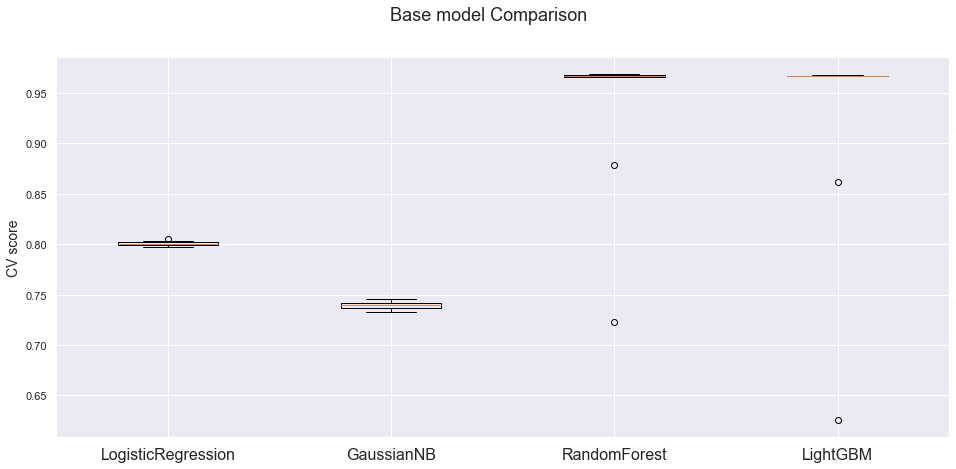

In [134]:
# initializing each model
rf = RandomForestClassifier()
lgr = LogisticRegression()
gnb = GaussianNB()
lgbm = LGBMClassifier()

models = [lgr,gnb,rf,lgbm]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train, y_train, cv = 10 , scoring = 'f1', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 18)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['LogisticRegression','GaussianNB','RandomForest','LightGBM'],
                  fontsize = 16)

plt.ylabel('CV score', fontsize = 14)
fig.set_size_inches(16,7)
plt.show() 

##  Testing

In [135]:
print('*******TRAIN RESULTS*******')
print('\n')

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    
    print('Model:',model,'\n')
    print('accuracy:',round(accuracy_score(y_train, y_pred)*100,2),'%','\n')
    print('f1_score(macro):',round(f1_score(y_train,y_pred, average = 'macro')*100,2),'%','\n')
    print('f1_score(weighted):',round(f1_score(y_train,y_pred, average = 'weighted')*100,2),'%','\n')
    print('recall-score:',round(recall_score(y_train,y_pred)*100,2),'%','\n')
    print('Classification report:','\n', classification_report(y_train, y_pred))
    print('------------------------------------------------------------------------------')
    print('\n')

*******TRAIN RESULTS*******


Model: LogisticRegression() 

accuracy: 79.6 % 

f1_score(macro): 79.59 % 

f1_score(weighted): 79.59 % 

recall-score: 82.01 % 

Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79    124002
           1       0.78      0.82      0.80    124002

    accuracy                           0.80    248004
   macro avg       0.80      0.80      0.80    248004
weighted avg       0.80      0.80      0.80    248004

------------------------------------------------------------------------------


Model: GaussianNB() 

accuracy: 75.22 % 

f1_score(macro): 75.16 % 

f1_score(weighted): 75.16 % 

recall-score: 70.3 % 

Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.80      0.76    124002
           1       0.78      0.70      0.74    124002

    accuracy                           0.75    248004
   macro avg       0.75      0.75      0.7

In [136]:
print('*******TEST RESULTS********')
print('\n')

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:,1]
    
    print('Model:',model,'\n')
    print('accuracy:',round(accuracy_score(y_test, y_pred)*100,2),'%','\n')
    print('f1_score(macro):',round(f1_score(y_test,y_pred, average = 'macro')*100,2),'%','\n')
    print('f1_score(weighted):',round(f1_score(y_test,y_pred, average = 'weighted')*100,2),'%','\n')
    print('recall-score:',round(recall_score(y_test,y_pred)*100,2),'%','\n')
    print('roc_auc_score:', round(roc_auc_score(y_test,y_pred_proba)*100,2),'%','\n')
    print('Classification report:','\n', classification_report(y_test, y_pred))
    print('------------------------------------------------------------------------------')
    print('\n')

*******TEST RESULTS********


Model: LogisticRegression() 

accuracy: 77.77 % 

f1_score(macro): 66.9 % 

f1_score(weighted): 81.14 % 

recall-score: 82.06 % 

roc_auc_score: 88.19 % 

Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.77      0.86     53145
           1       0.34      0.82      0.48      7569

    accuracy                           0.78     60714
   macro avg       0.65      0.80      0.67     60714
weighted avg       0.89      0.78      0.81     60714

------------------------------------------------------------------------------


Model: GaussianNB() 

accuracy: 78.8 % 

f1_score(macro): 66.17 % 

f1_score(weighted): 81.69 % 

recall-score: 70.95 % 

roc_auc_score: 82.79 % 

Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.80      0.87     53145
           1       0.33      0.71      0.45      7569

    accuracy                           0.79   

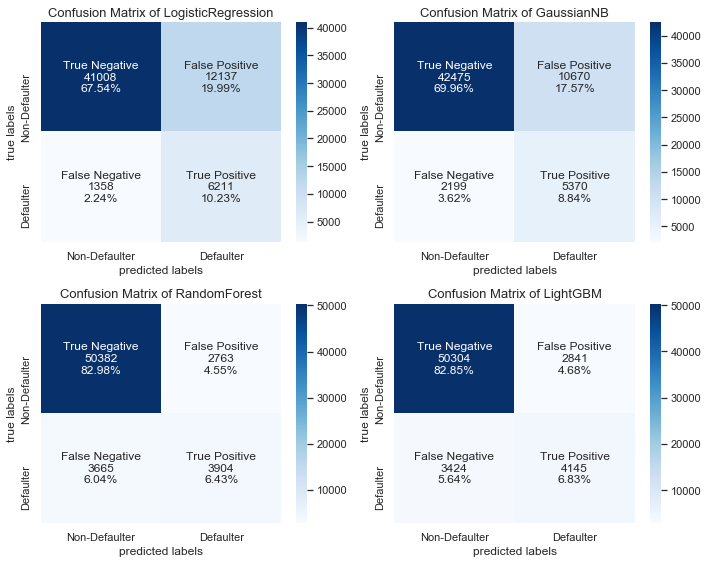

In [137]:
# visualizing confusion matrix  with the help of heatmaps.
model_index = [0,1,2,3]
model = ['LogisticRegression','GaussianNB','RandomForest','LightGBM']

for index ,model, model_name in zip(model_index,models,model):
    plt.subplot(2,2, index + 1 )
    y_pred = model.predict(x_test)
    c_matric = confusion_matrix(y_test, y_pred)
    groups = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ['{0:0.0f}'.format(value) for value in
                c_matric.flatten()]
    group_percent = ['{0:.2%}'.format(value) for value in
                     c_matric.flatten()/np.sum(c_matric)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(groups,group_counts,group_percent)]
    labels = np.asarray(labels).reshape(2,2)
    sb.heatmap(c_matric, annot=labels, fmt='', cmap='Blues')
    plt.title('Confusion Matrix of ' + model_name, fontsize = 13)
    plt.ylabel('true labels')
    plt.xlabel('predicted labels')
    fig, ax = plt.gcf(), plt.gca()
    ax.set_xticklabels(['Non-Defaulter','Defaulter'])
    ax.set_yticklabels(['Non-Defaulter','Defaulter'])
    fig.set_size_inches(10, 8)
    plt.tight_layout()
plt.show()

## Hyper-parameter Tuning and Threshold Adjustment

In [138]:
# initializing all model parameters
param_lgbm =  dict( boosting_type = ['gbdt','dart','goos','rf'],
   learning_rate = [0.01,0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.5, 0.6],
   max_depth = [3,4,5,6,7,8,-1],
   n_estimators = [75,100, 150, 200,250,300],
   num_leaves = [5,10,20,25,31,35,50,60],
   random_state =  [40,41,42,43,44],
   reg_alpha = [0,0.01,0.1,1,10,100],
   reg_lambda = [0,0.01,0.1,1,10,100]
                  )

param_rf = dict(n_estimators = [75,100,150,200,250,300], criterion = ['gini', 'entropy'],
                max_depth = [3,4,5,6,7,8,None], min_samples_split = [1,2,3],
                min_samples_leaf = [1,2,3], random_state = [40,41,42,43,44])


param_lgr =  dict(penalty = ['l1','l2','elasticnet'],  C =[0,0.01,0.1,1,10,100], 
                 solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 max_iter = [100,150,200,250,300,350,400,500])


param_gnb = {'var_smoothing': np.logspace(0,-9, num=500)}

In [139]:
# list containing models with their respective parameters
model_param = [(lgr,param_lgr), (gnb,param_gnb), (rf, param_rf), (lgbm, param_lgbm)]

In [140]:
# tuning all models
tuned_models = []
for model, param in model_param:
    
    r_search = RandomizedSearchCV(model, param, cv = 10, n_jobs = -1, scoring = 'f1',
                                  random_state = 0)
    r_search.fit( x_train, y_train)
    best_cvscore = r_search.best_score_
    best_param = r_search.best_params_
    best_estimator = r_search.best_estimator_
    tuned_models.append(best_estimator)
    
    print('model:',model)
    print('best_cvscore:',best_cvscore)
    print('best_parameter:', best_param)
    print('\n')
    
print('tuned_models:',tuned_models)

model: LogisticRegression()
best_cvscore: 0.8008405271431454
best_parameter: {'solver': 'sag', 'penalty': 'l2', 'max_iter': 150, 'C': 10}


model: GaussianNB()
best_cvscore: 0.7453670268703589
best_parameter: {'var_smoothing': 0.5363631316739242}


model: RandomForestClassifier()
best_cvscore: 0.9334708716974959
best_parameter: {'random_state': 43, 'n_estimators': 75, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}


model: LGBMClassifier()
best_cvscore: 0.9223714466974811
best_parameter: {'reg_lambda': 10, 'reg_alpha': 10, 'random_state': 41, 'num_leaves': 50, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.25, 'boosting_type': 'gbdt'}


tuned_models: [LogisticRegression(C=10, max_iter=150, solver='sag'), GaussianNB(var_smoothing=0.5363631316739242), RandomForestClassifier(n_estimators=75, random_state=43), LGBMClassifier(learning_rate=0.25, max_depth=3, n_estimators=300, num_leaves=50,
               random_state=41, reg_alpha=10, reg_la

LogisticRegression : Best Threshold= 0.5; G-Mean= 0.8 

GaussianNB : Best Threshold= 0.424; G-Mean= 0.76 

RandomForest : Best Threshold= 0.163; G-Mean= 0.8 

LightGBM : Best Threshold= 0.148; G-Mean= 0.81 



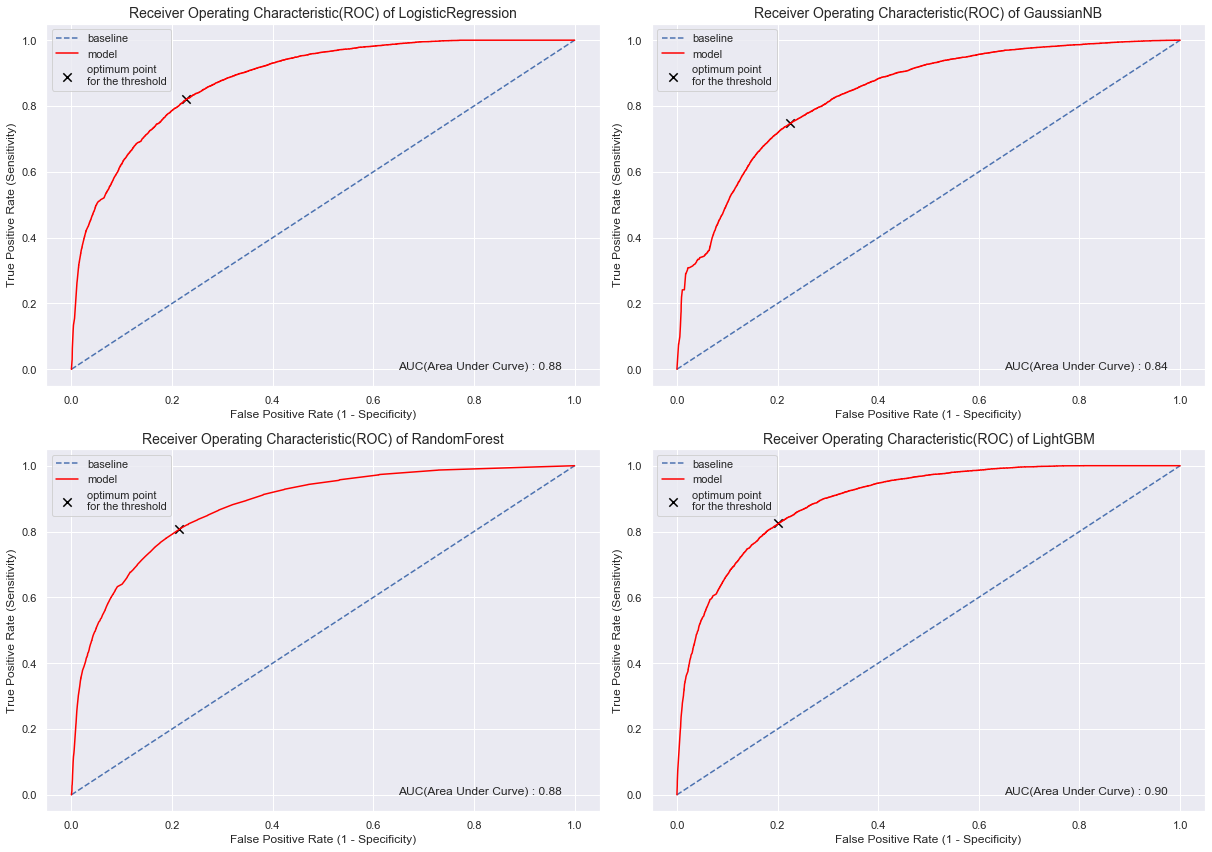

In [141]:
model_index = [0,1,2,3]
model = ['LogisticRegression','GaussianNB','RandomForest','LightGBM']

best_threshold = []
for index ,model, model_name in zip(model_index,tuned_models,model):
    plt.subplot(2,2, index + 1 )
    
    
    y_prob = model.predict_proba(x_test)[:,1]
    y_pred = model.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    auc_score = auc(false_positive_rate, true_positive_rate)
    
    
    gmeans = np.sqrt(true_positive_rate * (1-false_positive_rate)) # calculating geometric mean between sensitivity and specificity
    ix = np.argmax(gmeans)  # locating the index of the largest g-mean
    print(model_name,': Best Threshold= {}; G-Mean= {}' .format(round(thresholds[ix],3), round(gmeans[ix],2)),'\n')
    best_threshold.append(round(thresholds[ix],3))
    
    # plotting the roc curve for  the model
    plt.plot([0,1], [0,1], linestyle='--', label='baseline')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red',label = 'model' )
    plt.scatter(false_positive_rate[ix], true_positive_rate[ix], marker='x', color='black', label='optimum point \nfor the threshold',s = 70)
    plt.text(0.65,0,'AUC(Area Under Curve) : %0.2f' % auc_score)
    plt.title('Receiver Operating Characteristic(ROC) of ' + model_name, fontsize = 14)
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.legend()
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(17, 12)
    plt.tight_layout()
plt.show()

In [142]:
print('*******TEST RESULTS AFTER HYPER-PARAMETER TUNING AND THRESHOLD ADJUSTMENT********')
print('\n')

best_threshold
for model, threshold in zip(tuned_models, best_threshold):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    predicted_proba = model.predict_proba(x_test)
    y_pred = (predicted_proba[:,1] >= threshold).astype('int')
    
    print('Model:',model,'\n')
    print('accuracy:',round(accuracy_score(y_test, y_pred)*100,2),'%','\n')
    print('f1_score (macro):',round(f1_score(y_test,y_pred, average = 'macro')*100,2),'%','\n')
    print('f1_score (weighted):',round(f1_score(y_test,y_pred, average = 'weighted')*100,2),'%','\n')
    print('recall_score:',round(recall_score(y_test,y_pred)*100,2),'%','\n')
    print('Classification report:','\n', classification_report(y_test, y_pred))
    print('------------------------------------------------------------------------------')
    print('\n')

*******TEST RESULTS AFTER HYPER-PARAMETER TUNING AND THRESHOLD ADJUSTMENT********


Model: LogisticRegression(C=10, max_iter=150, solver='sag') 

accuracy: 77.77 % 

f1_score (macro): 66.9 % 

f1_score (weighted): 81.14 % 

recall_score: 82.06 % 

Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.77      0.86     53145
           1       0.34      0.82      0.48      7569

    accuracy                           0.78     60714
   macro avg       0.65      0.80      0.67     60714
weighted avg       0.89      0.78      0.81     60714

------------------------------------------------------------------------------


Model: GaussianNB(var_smoothing=0.5363631316739242) 

accuracy: 77.19 % 

f1_score (macro): 65.28 % 

f1_score (weighted): 80.54 % 

recall_score: 74.67 % 

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.78      0.86     53145
           1       0.32     

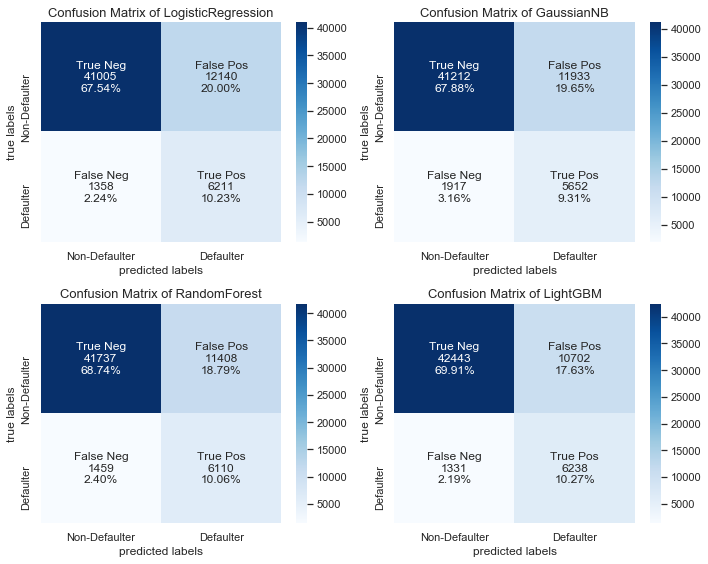

In [143]:
# visualizing confusion matrix with the help of heatmaps.
model_index = [0,1,2,3]
model = ['LogisticRegression','GaussianNB','RandomForest','LightGBM']


for index ,model, model_name, threshold in zip(model_index,tuned_models,model, best_threshold):
    plt.subplot(2,2, index + 1 )

    y_pred = model.predict(x_test)
    predicted_proba = model.predict_proba(x_test)
    y_pred = (predicted_proba[:,1] >= threshold).astype('int')
    
    c_matric = confusion_matrix(y_test, y_pred)
    groups = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                c_matric.flatten()]
    group_percent = ['{0:.2%}'.format(value) for value in
                     c_matric.flatten()/np.sum(c_matric)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(groups,group_counts,group_percent)]
    labels = np.asarray(labels).reshape(2,2)
    sb.heatmap(c_matric, annot=labels, fmt='', cmap='Blues')
    plt.title('Confusion Matrix of ' + model_name, fontsize = 13)
    plt.ylabel('true labels')
    plt.xlabel('predicted labels')
    fig, ax = plt.gcf(), plt.gca()
    ax.set_xticklabels(['Non-Defaulter','Defaulter'])
    ax.set_yticklabels(['Non-Defaulter','Defaulter'])
    fig.set_size_inches(10, 8)
    plt.tight_layout()
plt.show()

In [144]:
# selecting the best performing model
selected_model = tuned_models[-1]

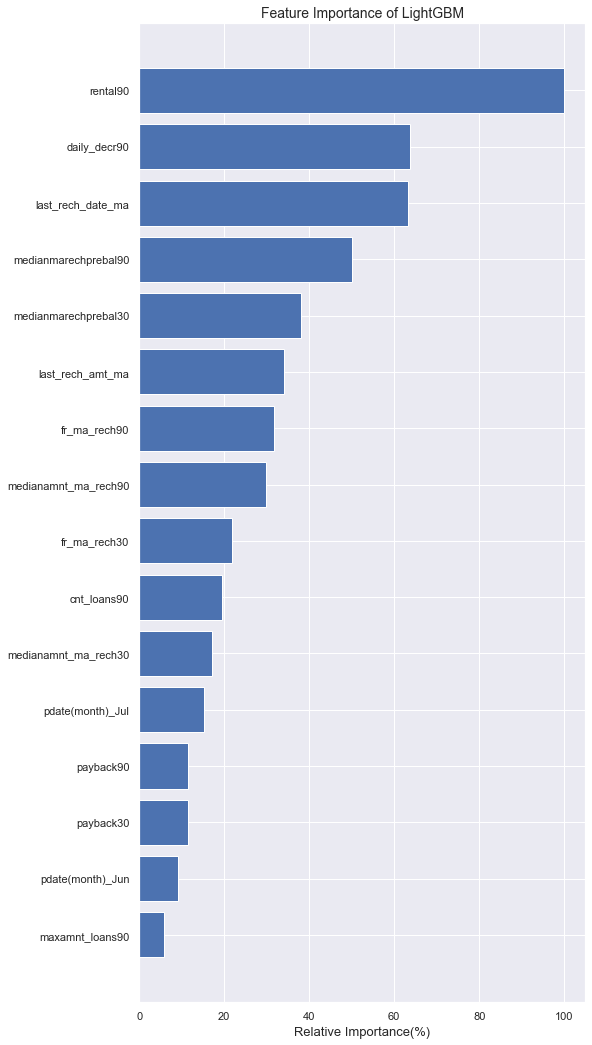

In [145]:
# plotting feature importance of the selected model
feature_importance = selected_model.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
yl = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(8, 18))
plt.barh(yl, feature_importance[sorted_idx], align='center')
plt.yticks(yl, x_train.keys()[sorted_idx])
plt.xlabel('Relative Importance(%)',fontsize = 13)
plt.title('Feature Importance of LightGBM',fontsize = 14)
plt.show()